<a href="https://colab.research.google.com/github/niranjanmeegammana/DS-master/blob/main/mlc_hpt_gridsearchcv_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Use GridSearchCV and select the best hyperparamter for Support Vector machine

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
url ='https://raw.githubusercontent.com/niranjanmeegammana/ML-master/main/0X_HYP/Advertising_data.csv'
dataset = pd.read_csv(url)
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values



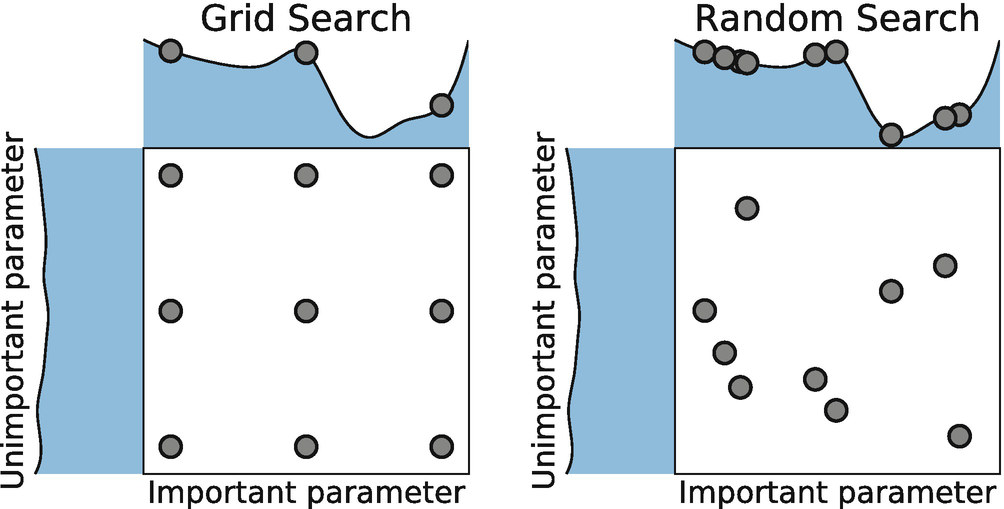

Hyperparameter tuning is the process of finding the optimal values for hyperparameters of a machine learning model. It involves searching through a predefined range of hyperparameter values, evaluating model performance using cross-validation, and selecting the combination that produces the best results. The goal is to improve the model's performance, prevent overfitting, and enhance generalization on unseen data, leading to a more effective and accurate machine learning model.

https://medium.com/@cjl2fv/an-intro-to-hyper-parameter-optimization-using-grid-search-and-random-search-d73b9834ca0a

https://www.analyticsvidhya.com/blog/2022/02/a-comprehensive-guide-on-hyperparameter-tuning-and-its-techniques/



In [ ]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [ ]:
X[0], y[0]

(array([   19., 19000.]), 0)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

In [ ]:
X_train[0:3]


array([[4.6e+01, 2.3e+04],
       [2.8e+01, 4.4e+04],
       [5.1e+01, 2.3e+04]])

scaling numerical features of a dataset to bring all the features to a similar scale, so they have comparable ranges and prevent some features from dominating others during machine learning model training.

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train[0:3]

array([[ 0.77063564, -1.37090753],
       [-0.95681661, -0.74731782],
       [ 1.25048349, -1.37090753]])

In [ ]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

                Actual Positive    Actual Negative
Predicted Positive       TP                FP

Predicted Negative       FN                TN


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[60,  6],
       [ 9, 25]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

In [ ]:
accuracy

0.85

`GridSearchCV` is a hyperparameters

1. `estimator`: MLmodel  tuned.
2. `param_grid`: list of dictionaries specifing hyperparameters and their corresponding values to be tested.
3. `scoring`: scoring metric used to evaluate the model's performance
4. `cv`: The number of cross-validation folds
5. `n_jobs`: The number of CPU cores to use
6. `verbose`: Controls the verbosity during process
7. `refit`: If set to `True`refit the best model
8. `return_train_score`: Determines including training scores
9. `iid`: If `True`, the data identically distributed across the folds.
10. `error_score`: Specifies how to handle errors

The `GridSearchCV` class performs an exhaustive search over all possible combinations of hyperparameters specified in `param_grid`.

In [ ]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1, verbose=1)
grid_search = grid_search.fit(X_train, y_train)


Fitting 10 folds for each of 40 candidates, totalling 400 fits


In [ ]:
accuracy = grid_search.best_score_


In [ ]:
accuracy

0.9100000000000001

In [ ]:
grid_search.best_params_

{'C': 10, 'gamma': 0.3, 'kernel': 'rbf'}

In [ ]:
classifier = SVC(kernel = 'rbf', gamma=0.7)
classifier.fit(X_train, y_train)

SVC(gamma=0.7)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[61,  5],
       [ 2, 32]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

In [ ]:
accuracy

0.93